# 0. Introduction

One hundred Chinese nationals took part in data collection. 

Each participant wrote with a standard black ink pen all 15 numbers in a table with 15 designated regions drawn on a white A4 paper. 

This process was repeated 10 times with each participant. Each sheet was scanned at the resolution of 300x300 pixels.

# 1. Package Initialization

In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report

from skimage.io import imread, imshow

from collections import defaultdict
from glob import glob
import math, re


"""
    Math Plot Library Configs
"""

%matplotlib inline
mpl.style.use('seaborn')
mpl.rcParams["figure.facecolor"] ='#f6f5f5'

"""
    Pandas Configs
"""

# show all columns
# pd.set_option('max_columns', None)

# show all rows
pd.set_option("max_rows", None)

# Whether to print out the full DataFrame repr for wide DataFrames across multiple lines, 
# max_columns is still respected, but the output will wrap-around across multiple “pages” 
# if it’s width exceeds display.width. [default: True] [currently: True]
pd.set_option('display.expand_frame_repr', False)


"""
    Seaborn Configs
"""
sns.set_palette("pastel")

# 2. Data Preparation

First and foremost, we would have to import the labels of the images from the filename to the Panda dataframe, so that we can train our Neural Network.

However, before we start creating the labels, let us look at all of the possible labels:

<img src="../characters_mapping.png" alt="MNIST Chinese Character Mapping" width="250px" align="left"/>

## a. Sample Data

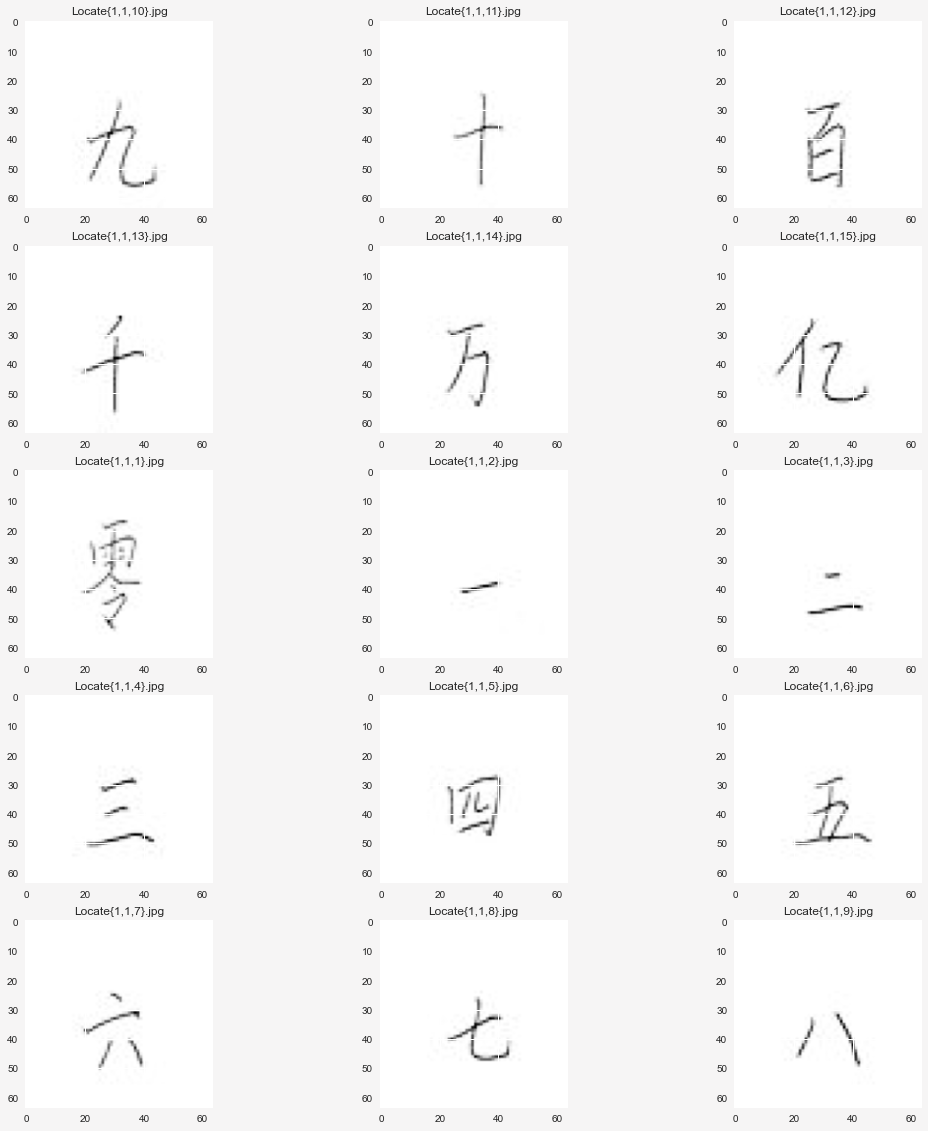

In [50]:
FIRST_N_DATA = 15
NUMBER_OF_IMG_PER_ROWS = 5

filepaths = sorted(glob('../raw_dataset/*.jpg'))
truncated_filepaths = filepaths[:FIRST_N_DATA]

rows_no = 1 * NUMBER_OF_IMG_PER_ROWS
cols_no = math.ceil(len(truncated_filepaths) / NUMBER_OF_IMG_PER_ROWS)
fig, axis = plt.subplots(
    rows_no , 
    cols_no , 
    figsize=(18,20)
)

for img_path, axis in zip(truncated_filepaths, axis.flatten()):
    axis.imshow(imread(img_path))
    axis.set_title(img_path.split('/')[-1])

## b. Convert Image and its Metadata into Labels and Panda Dataframe

In [146]:
ROW_IN_PIXEL = 64
COL_IN_PIXEL = 64
COL_NAMES = build_col_names(ROW_IN_PIXEL, COL_IN_PIXEL)

CHARACTER_LABEL_MAPPING = {
    '1': "零",
    '2': "一",
    '3': "二",
    '4': "三",
    '5': "四",
    '6': "五",
    '7': "六",
    '8': "七",
    '9': "八",
    '10': "九",
    '11': "十",
    '12': "百",
    '13': "千",
    '14': "萬",
    '15': "億"
}

In [139]:
# return list: [img_idx, pixel_1, ..., pixel_4096, label]
def build_col_names(ROW_IN_PIXEL, COL_IN_PIXEL):
    col_names = ['img_idx']
    for i in range(ROW_IN_PIXEL * COL_IN_PIXEL):
        col_names.append(f'pixel_{i+1}')
    col_names.append('character')
    col_names.append('label')
    return col_names

def get_label_from_path(img_path):
    filename = img_path.split('/')[-1]
    matching_str = re.search(r"\{[\w,]+\}", filename)
    cleaned_matching_str = matching_str.group(0).replace('{', '').replace('}', '')
    label = cleaned_matching_str.split(',')[-1]
    return label

def vectorize_image_into_1d_array(img_path):
    img = plt.imread(img_path)
    rows, cols = img.shape # gives dimensions for BW array
    img_size = rows*cols
    img_1D_vector = img.reshape(img_size)
    return img_1D_vector

In [147]:
data = []

for img_idx, img_path in enumerate(truncated_filepaths):
    temp = []
    temp.append(img_idx)
    
    img_1D_vector = vectorize_image_into_1d_array(img_path)
    temp.extend(img_1D_vector)
    
    label = get_label_from_path(img_path)
    temp.append(CHARACTER_LABEL_MAPPING[label])
    temp.append(label)
    
    data.append(temp)
    
df = pd.DataFrame(data, columns = COL_NAMES)
display(df.head())

img_idx  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  pixel_8  pixel_9  pixel_10  pixel_11  pixel_12  pixel_13  pixel_14  pixel_15  pixel_16  pixel_17  pixel_18  pixel_19  pixel_20  pixel_21  pixel_22  pixel_23  pixel_24  pixel_25  pixel_26  pixel_27  pixel_28  pixel_29  pixel_30  pixel_31  pixel_32  pixel_33  pixel_34  pixel_35  pixel_36  pixel_37  pixel_38  pixel_39  pixel_40  pixel_41  pixel_42  pixel_43  pixel_44  pixel_45  pixel_46  pixel_47  pixel_48  pixel_49  pixel_50  pixel_51  pixel_52  pixel_53  pixel_54  pixel_55  pixel_56  pixel_57  pixel_58  pixel_59  pixel_60  pixel_61  pixel_62  pixel_63  pixel_64  pixel_65  pixel_66  pixel_67  pixel_68  pixel_69  pixel_70  pixel_71  pixel_72  pixel_73  pixel_74  pixel_75  pixel_76  pixel_77  pixel_78  pixel_79  pixel_80  pixel_81  pixel_82  pixel_83  pixel_84  pixel_85  pixel_86  pixel_87  pixel_88  pixel_89  pixel_90  pixel_91  pixel_92  pixel_93  pixel_94  pixel_95  pixel_96  pixel_97  pixel_98  pixel_99  pixel_100  pixel_101  pixel_102  pixel_103  pixel_104  pixel_105  pixel_106  pixel_107  pixel_108  pixel_109  pixel_110  pixel_111  pixel_112  pixel_113  pixel_114  pixel_115  pixel_116  pixel_117  pixel_118  pixel_119  pixel_120  pixel_121  pixel_122  pixel_123  pixel_124  pixel_125  pixel_126  pixel_127  pixel_128  pixel_129  pixel_130  pixel_131  pixel_132  pixel_133  pixel_134  pixel_135  pixel_136  pixel_137  pixel_138  pixel_139  pixel_140  pixel_141  pixel_142  pixel_143  pixel_144  pixel_145  pixel_146  pixel_147  pixel_148  pixel_149  pixel_150  pixel_151  pixel_152  pixel_153  pixel_154  pixel_155  pixel_156  pixel_157  pixel_158  pixel_159  pixel_160  pixel_161  pixel_162  pixel_163  pixel_164  pixel_165  pixel_166  pixel_167  pixel_168  pixel_169  pixel_170  pixel_171  pixel_172  pixel_173  pixel_174  pixel_175  pixel_176  pixel_177  pixel_178  pixel_179  pixel_180  pixel_181  pixel_182  pixel_183  pixel_184  pixel_185  pixel_186  pixel_187  pixel_188  pixel_189  pixel_190  pixel_191  pixel_192  pixel_193  pixel_194  pixel_195  pixel_196  pixel_197  pixel_198  pixel_199  pixel_200  pixel_201  pixel_202  pixel_203  pixel_204  pixel_205  pixel_206  pixel_207  pixel_208  pixel_209  pixel_210  pixel_211  pixel_212  pixel_213  pixel_214  pixel_215  pixel_216  pixel_217  pixel_218  pixel_219  pixel_220  pixel_221  pixel_222  pixel_223  pixel_224  pixel_225  pixel_226  pixel_227  pixel_228  pixel_229  pixel_230  pixel_231  pixel_232  pixel_233  pixel_234  pixel_235  pixel_236  pixel_237  pixel_238  pixel_239  pixel_240  pixel_241  pixel_242  pixel_243  pixel_244  pixel_245  pixel_246  pixel_247  pixel_248  pixel_249  pixel_250  pixel_251  pixel_252  pixel_253  pixel_254  pixel_255  pixel_256  pixel_257  pixel_258  pixel_259  pixel_260  pixel_261  pixel_262  pixel_263  pixel_264  pixel_265  pixel_266  pixel_267  pixel_268  pixel_269  pixel_270  pixel_271  pixel_272  pixel_273  pixel_274  pixel_275  pixel_276  pixel_277  pixel_278  pixel_279  pixel_280  pixel_281  pixel_282  pixel_283  pixel_284  pixel_285  pixel_286  pixel_287  pixel_288  pixel_289  pixel_290  pixel_291  pixel_292  pixel_293  pixel_294  pixel_295  pixel_296  pixel_297  pixel_298  pixel_299  pixel_300  pixel_301  pixel_302  pixel_303  pixel_304  pixel_305  pixel_306  pixel_307  pixel_308  pixel_309  pixel_310  pixel_311  pixel_312  pixel_313  pixel_314  pixel_315  pixel_316  pixel_317  pixel_318  pixel_319  pixel_320  pixel_321  pixel_322  pixel_323  pixel_324  pixel_325  pixel_326  pixel_327  pixel_328  pixel_329  pixel_330  pixel_331  pixel_332  pixel_333  pixel_334  pixel_335  pixel_336  pixel_337  pixel_338  pixel_339  pixel_340  pixel_341  pixel_342  pixel_343  pixel_344  pixel_345  pixel_346  pixel_347  pixel_348  pixel_349  pixel_350  pixel_351  pixel_352  pixel_353  pixel_354  pixel_355  pixel_356  pixel_357  pixel_358  pixel_359  pixel_360  pixel_361  pixel_362  pixel_363  pixel_364  pixel_365  pixel_366  pixel_367  pixel_368  pixel_369  pixel_370  pixel_371  pixel_372  pixel_3

# Neural Network

## Neural Network Architecture

1 input layer,
1 hidden layer,
1 output layer